In [64]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
path = os.path.join(os.getcwd(), "Born in the USA")

In [66]:
def get_years(step):
    years = [i for i in range(1900, 2001, step)]
    return years

In [67]:
def get_names(years=get_years(1)):
    year_path = ""
    names_by_year = {}
    for year in years:
        year_path = os.path.join(path, "yob{}.txt".format(str(year)))
        names_by_year[year] = pd.read_csv(year_path, names=['Name', 'Gender', 'Number'] )
    names_all = pd.concat(names_by_year, names=['Year']).query('Name == ["Ruth", "Robert"]')
    name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

    return name_dynamics.unstack('Name')

In [51]:
def print_plot(data_frame):
    data_frame.plot()

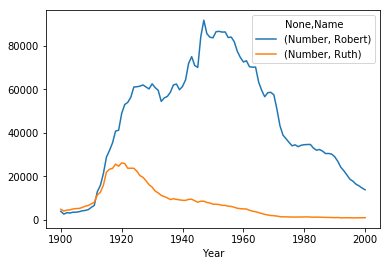

In [52]:
print_plot(get_names())

In [80]:
def print_bar(data_frame):
    data_frame.plot(kind='bar', stacked=True)
    plt.show()

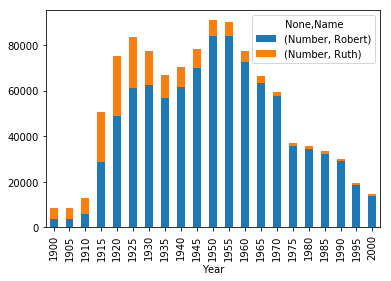

In [81]:
print_bar(get_names(years=get_years(5)))

In [75]:
def confirm_name(name):
    if name[0] == "R":
        return name

In [74]:
def get_ten(year):
    year_path = os.path.join(path, "yob{}.txt".format(str(year)))
    df = pd.read_csv(year_path, names=['Gender', 'Number'])
    df = df.drop(["Gender"], axis='columns')
    df = df.groupby(confirm_name).sum().sort_values('Number', ascending=False).head(10)
    return df

In [78]:
def print_pie(data_frame):
    labels = data_frame.index
    sizes = data_frame.values
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0) 

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)

    plt.show()

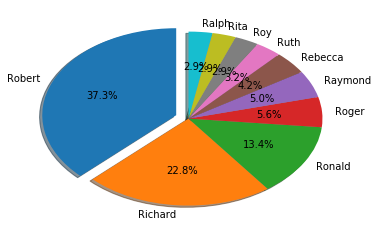

In [79]:
print_pie(get_ten(1950))

In [53]:
def consonant_count(name):
    word = name.lower() 
    consonants = 'bcdfghjklmnpqrstvwxz'
    return sum(1 for letter in word if letter in consonants)

In [57]:
def get_statistic(years=get_years(1)):
    year_path = ""
    df = pd.DataFrame()
    for year in years:
        year_path = os.path.join(path, "yob{}.txt".format(str(year)))
        df = df.append(pd.read_csv(year_path, names=['Name', 'Gender', 'Number'] ))
    df = df.drop(["Gender"], axis='columns')
    df['Count'] = 0
    df = df.groupby('Name').sum()
    df = df.reset_index()
    df['Count'] = df['Name'].apply(consonant_count)
    df = df.groupby('Count').sum()
        
    return df
    

In [59]:
def print_scatter(data_frame):
    plt.scatter(data_frame.index, data_frame.values)
    plt.xlabel('Количество согласных букв')
    plt.ylabel('Количество употреблений')
    plt.show()

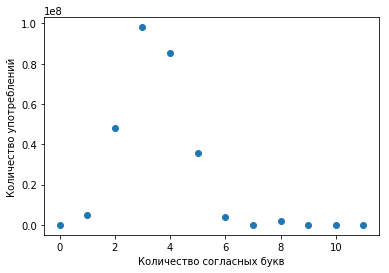

In [60]:
print_scatter(get_statistic())